# Invest $10,000
## Which Stock Will YOU Choose?

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def loadData(code="AAPL", startDate="2023-01-01", endDate="2024-01-01"):
    if startDate > endDate:
        print("Start Date must be before End Date!")
        return None

    startDate = datetime.strptime(startDate, "%Y-%m-%d")
    startDate = startDate - timedelta(days=20)#subtract days to adjust for sma delay
    startDate = startDate.strftime("%Y-%m-%d")

############################ pls i hope yf lets me download data again ############################## TODO
    # stock = yf.download(code, start=startDate, end=endDate, progress=False, threads=False)["Close"]
    dates = pd.date_range(start="2023-01-01", periods=100)
    prices = np.cumsum(np.random.randn(100)) + 100  # some fake "price" series

    stock = pd.DataFrame({
        "Close": prices
    }, index=dates)## til here

    print(stock.columns)# testing

    if isinstance(stock.columns, pd.MultiIndex):
        stock.columns = stock.columns.droplevel(1)

    if 'Close' not in stock.columns:
        print("Error: 'Close' column is missing. Check the ticker symbol.")
        print(stock.head())
        return None

    print(stock.head(2))

    # Calculate
    stock["SMA_20"] = stock["Close"].rolling(window=20).mean()

    if stock.empty:
        print(f"No data found for '{code}'. Check the stock code and date range.")
        return None

    return stock


In [ ]:

#print(stock.head(2))
print("...")
print("This strategy uses 20 Day Simple Moving Average.")
print("When current closing price SMA_20 (red), you buy $10,000 worth")
print("And when SMA_10 gets overtaken by SMA_20, you sell all for cash")# turn into markdown cells not print lol

def signals(stock):
  stock["SMA_20"] = stock["Close"].rolling(window=10).mean()#TODO change variable to perform well
  return stock

def backtest(stock, currentCash=1000):
  currentStocksBought = 0
  currentValue = currentCash
  buys = 0
  sells = 0

  holdCash = currentCash
  holdStocksBought = 0
  holdValue = 0
  holding = False

  for date, row in stock.iterrows():
    if pd.isna(row["SMA_20"]) or pd.isna(row["Close"]):
      continue

    currentPrice = row["Close"]
    
    # passive strategy
    holdValue = holdStocksBought * currentPrice
    stock.loc[date, "Hold_Value"] = holdValue
    
    # Trading strategy
    sma20 = row["SMA_20"]

    if holding == False:
      holdStocksBought = holdCash / currentPrice
      holdCash = 0
      stock.loc[date, "Hold_Value"] = holdStocksBought * currentPrice
      holding = True

    if currentPrice > sma20:
      if currentCash > 0:
        currentStocksBought = currentCash / currentPrice
        currentCash = 0
        buys += 1
    else:
      if currentStocksBought > 0:
        currentCash = currentStocksBought * currentPrice
        currentStocksBought = 0
        sells += 1

    assetsValue = currentStocksBought * currentPrice
    currentValue = assetsValue + currentCash
    stock.loc[date, "Portfolio_Value"] = currentValue

    print(str(currentValue) + " = " + str(currentPrice) + " * " + str(currentStocksBought))

  # make sure correct data type
  stock["Portfolio_Value"] = stock["Portfolio_Value"].astype(float)
  stock["Hold_Value"] = stock["Hold_Value"].astype(float)
  print(f"Final portfolio value: ${currentValue:.2f}")
  print(f"Hypothetical hold value: ${holdValue:.2f}")

  return stock

...
This strategy uses 20 Day Simple Moving Average.
When current closing price SMA_20 (red), you buy $10,000 worth
And when SMA_10 gets overtaken by SMA_20, you sell all for cash
Index(['Close'], dtype='object')
                 Close
2023-01-01  101.843131
2023-01-02  101.214856


In [ ]:
def graph(stock, code="AAPL"):
    fig, ax1 = plt.subplots(figsize=(12, 8)) 

    # plot first y-axis
    ax1.plot(stock.index, stock["Close"], label=code + " Price", color="blue")
    ax1.plot(stock.index, stock["SMA_20"], label=code + " 20-Day SMA", linestyle="--", color="red")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Price (USD)")
    ax1.legend(loc="upper left") # legend is the label
    ax1.grid(True)

    # second y axis
    ax2 = ax1.twinx()  
    ax2.plot(stock.index, stock["Portfolio_Value"], label="Portfolio Value", color="cyan")
    ax2.plot(stock.index, stock["Hold_Value"], label="Hold Value", color="yellow")
    ax2.set_ylabel("Portfolio Value (USD)")
    ax2.legend(loc="upper right")


    plt.title(code + " Strategy vs Hold Comparison")
    plt.show()

1000.0 = 97.92934327205047 * 0
1000.0 = 97.11316867082616 * 0
1000.0 = 94.94102063426075 * 0
1000.0 = 94.74115791188198 * 0
1000.0 = 95.42195064873775 * 0
1000.0 = 96.63523517394736 * 0
1000.0 = 96.1094053261427 * 0
1000.0 = 94.65492827228982 * 0
1000.0 = 95.8531824505769 * 0
1000.0 = 96.0591698529385 * 10.410250281477001
997.3106796970213 = 95.8008359771657 * 10.410250281477001
986.556921067234 = 94.76783885038947 * 0
986.556921067234 = 95.3959572495411 * 0
986.556921067234 = 97.89106679445769 * 10.078109815053013
995.5450647259827 = 98.78291495087721 * 10.078109815053013
992.3616035328877 = 98.46703615500023 * 10.078109815053013
984.0154759951681 = 97.63889201975242 * 10.078109815053013
980.5115330685959 = 97.29121343806653 * 10.078109815053013
975.8133016208756 = 96.8250316307694 * 0
975.8133016208757 = 98.18844202802872 * 9.938168703627271
991.6887041835151 = 99.78585932250927 * 9.938168703627271
991.0318265261672 = 99.71976287386393 * 9.938168703627271
990.2820349649113 = 99.64431

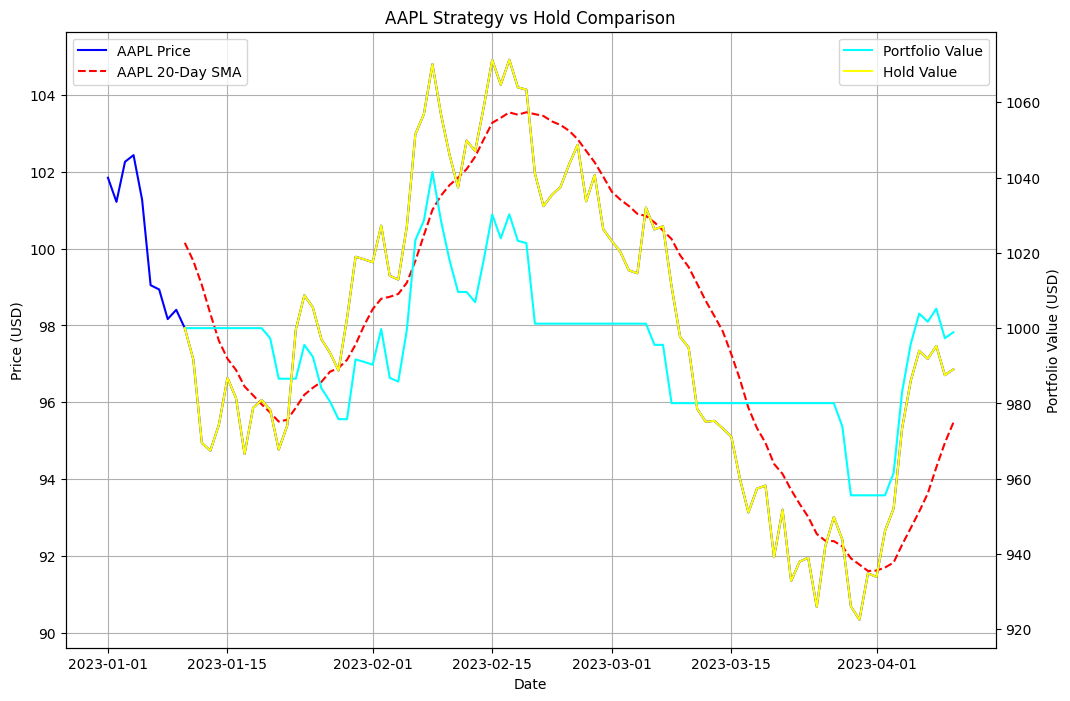

In [ ]:
data = loadData()
data = signals(data)
data = backtest(data)
graph(data)


0.2.54
